# Project Description

This project analyzes Amazon Prime Video’s content library to explore trends in movies and TV shows. Using data about titles, genres, ratings, and production countries, the goal is to understand the platform’s content distribution, popular genres, and regional presence.

# LOAD DATASET



In [1]:
import pandas as pd
titles = pd.read_csv("/content/credits.csv")
credits = pd.read_csv("/content/credits.csv")
print("titles:", titles.shape)
print("credits:", credits.shape)
print("\nTitles columns:\n", titles.columns.tolist())
print("\nCredits columns:\n", credits.columns.tolist())
titles.head()

titles: (124235, 5)
credits: (124235, 5)

Titles columns:
 ['person_id', 'id', 'name', 'character', 'role']

Credits columns:
 ['person_id', 'id', 'name', 'character', 'role']


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


MERGING BOTH THE CSV FILE


In [4]:
# Makes code more easier, keeps data aligned, makes deeper analysis possible

import pandas as pd

titles = pd.read_csv("/content/titles.csv")
credits = pd.read_csv("/content/credits.csv")

merged = pd.merge(titles, credits, on="id", how="left")
merged.to_csv("amazon_prime.csv", index=False)
print("Merged file saved successfully!")
print(merged.shape)




Merged file saved successfully!
(125354, 19)


#Preparation of Dataset

basic information


In [7]:
df = pd.read_csv("/content/amazon_prime.csv")


print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.head()

Shape: (125354, 19)

Columns:
 ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'person_id', 'name', 'character', 'role']


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR


#removing duplicates and empty rows

Duplicate or empty titles add no value and can mess up counts or averages.

In [12]:
df = df.drop_duplicates()

df = df.dropna(subset=["title"])

print( df.shape)


(125186, 19)


# convert numeric columns

making sure numbers are actually treated as numbers (not strings).
If any value can’t be converted (like “N/A”), it becomes NaN.



In [13]:
num_cols = ["imdb_score", "imdb_votes", "tmdb_score", "tmdb_popularity", "runtime", "release_year"]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

print(df[num_cols].dtypes)

imdb_score         float64
imdb_votes         float64
tmdb_score         float64
tmdb_popularity    float64
runtime              int64
release_year         int64
dtype: object


# Clean and standardize text columns

Removes unwanted spaces and fixes capitalization like “movie” → “Movie”.

In [14]:
text_cols = ["title", "show_type", "genres", "production_countries", "role"]

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

# Handle missing values

Instead of dropping missing rows, replace with unknown for text and median for numbers


In [15]:
# for numbers
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# for text
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# saving my final dataset


In [21]:
final_dataset = "/content/amazon_prime.csv"
df.to_csv(final_dataset, index=False)
print("prepared dataset saved at:", final_dataset)

prepared dataset saved at: /content/amazon_prime.csv


# content overview
 what kinds of content Amazon Prime offers.

In [30]:
df['genres'] = df['genres'].astype(str).str.replace('[', '', regex=False)
df['genres'] = df['genres'].str.replace(']', '', regex=False)
df['genres'] = df['genres'].str.replace("'", '', regex=False)
df['genres'] = df['genres'].str.replace('|', ',', regex=False)
df['genres'] = df['genres'].str.strip()

df['production_countries'] = df['production_countries'].astype(str).str.replace('[', '', regex=False)
df['production_countries'] = df['production_countries'].str.replace(']', '', regex=False)
df['production_countries'] = df['production_countries'].str.replace("'", '', regex=False)
df['production_countries'] = df['production_countries'].str.replace('|', ',', regex=False)
df['production_countries'] = df['production_countries'].str.strip()

# 1. Count of Movies vs TV Shows
if "type" in df.columns:
    print("Movies vs TV Shows:\n", df["type"].value_counts(), "\n")

# 2. Top 10 Genres
top_genres = df["genres"].str.split(",").explode().str.strip().value_counts().head(10)
print("Top 10 Genres:\n", top_genres, "\n")

# 3. Top 10 Production Countries
top_countries = df["production_countries"].str.split(",").explode().str.strip().value_counts().head(10)
print("Top 10 Production Countries:\n", top_countries)


Movies vs TV Shows:
 type
MOVIE    116685
SHOW       8501
Name: count, dtype: int64 

Top 10 Genres:
 genres
Drama       70006
Comedy      41493
Thriller    33079
Action      30400
Romance     28633
Crime       20618
Horror      14142
European    12548
Scifi       11442
Fantasy      8935
Name: count, dtype: int64 

Top 10 Production Countries:
 production_countries
Us    79111
Gb    12574
In    11591
Ca     6625
Fr     4861
De     3219
       2745
Jp     2650
It     2578
Au     2195
Name: count, dtype: int64


#visualizations


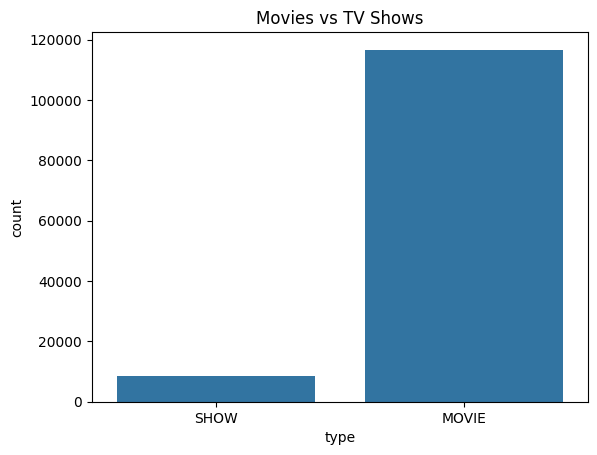

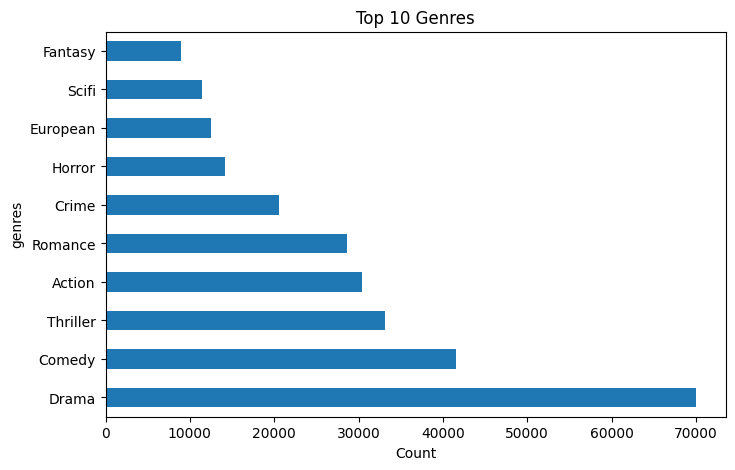

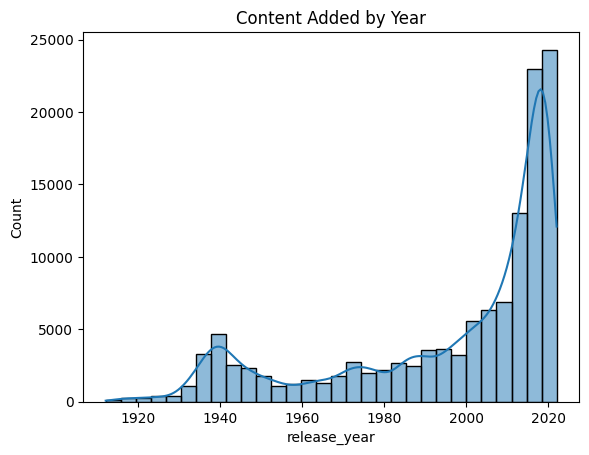

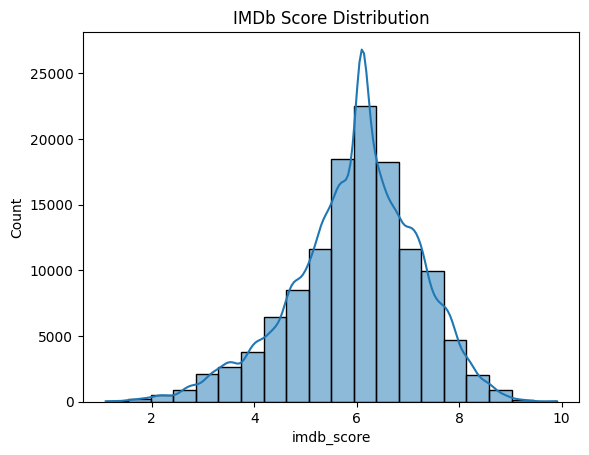

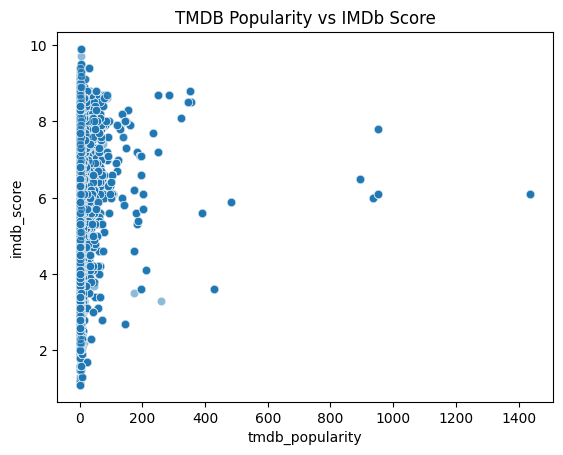

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Show type count
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows')
plt.show()

# 2. Top 10 Genres
top_genres.head(10).plot(kind='barh', title='Top 10 Genres', figsize=(8,5))
plt.xlabel('Count')
plt.show()

# 3. Release Year Trend
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Content Added by Year')
plt.show()

# 4. IMDb Score Distribution
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title('IMDb Score Distribution')
plt.show()

# 5. TMDB Popularity vs IMDb Score
sns.scatterplot(x='tmdb_popularity', y='imdb_score', data=df, alpha=0.5)
plt.title('TMDB Popularity vs IMDb Score')
plt.show()


# insights

In [35]:
# 1. Most frequent actors/directors
print(df['name'].value_counts().head(10))

# 2. Average IMDb score by role type
df.groupby('role')['imdb_score'].mean()

name
George 'Gabby' Hayes    49
Roy Rogers              45
Bess Flowers            44
Joseph Kane             41
Gene Autry              40
Sam Newfield            38
Nassar                  37
Herman Hack             35
Charles King            35
Jay Chapman             34
Name: count, dtype: int64


,imdb_score
role,
Actor,5.983377
Director,5.855521
Nan,6.372393


# Conclusion


The analysis shows that Amazon Prime mainly features movies, with Drama, Comedy, and Thriller as the most popular genres. The United States, India, and the United Kingdom are the top content-producing countries. These insights highlight Prime Video’s diverse catalog and global reach in the streaming industry.